In [1]:
import tensorflow as tf

In [2]:
import os

In [14]:
import PIL

In [3]:
from PIL import Image
import cv2

In [4]:
imgpaths = {}
pth = './dataset/png'
for d in os.listdir(pth):
    if not os.path.isdir(pth + '/' + d):
        continue
    for img in os.listdir(pth + '/' +d):
        path = './dataset/png/'+d
        if d not in imgpaths:
            imgpaths[d] = []
        imgpaths[d].append(path + '/' + img)

In [5]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, db_dir, batch_size, input_shape, num_classes=None, 
                 shuffle=True, dir_classes=False):
        
        # todo: fix num classes
        
        self.current_counter = 0
        self.label_dict = {}

        self.input_shape = input_shape
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.shuffle = shuffle
        
        # load the data from the root directory
        self.data, self.labels = self.get_data(db_dir)
        self.indices = np.arange(len(self.data))
        self.on_epoch_end()


    def get_data(self, root_dir):
        """"
        Loads the paths to the images and their corresponding labels from the database directory
        """
        self.data = []
        self.labels = []

        path = root_dir
        pth = path
        
        #pth = './dataset/png'
        for d in os.listdir(pth):
            if not os.path.isdir(pth + '/' + d):
                continue
            for img in os.listdir(pth + '/' + d):
                path = './dataset/png/'+ d
                if d not in imgpaths:
                    imgpaths[d] = []
                imgpaths[d].append(path + '/' + img)
                
        for i in imgpaths.keys():
            for j in imgpaths[i]:
                self.data.append(j)
                self.labels.append(i)

        return self.data, self.labels

    def __len__(self):
        """
        Returns the number of batches per epoch: the total size of the dataset divided by the batch size
        """
        return int(np.floor(len(self.data) / self.batch_size))
        # TODO your code  here (size of dataset divided by the batch size)
        return 0
    
    def vec_to_tensor(self, v):
      return constant(v)
    
    """
        Preprocesses before outputting to .fit()
        This can mean: reshape, channel count check, mean subtraction and std. dev division.
    """
    def batch_to_train(self, batch_x, batch_y):
        x_train = [self.vec_to_tensor(x) for x in batch_x]
        y_train = [self.vec_to_tensor(x) for x in batch_y]

        #print(self.input_shape)
        x_train = [cv2.resize(np.array(i), (self.input_shape[0], self.input_shape[1])) for i in x_train]
        x_train2 = []
        y_train2 = []

        for i in range(len(x_train)):
          if (x_train[i].shape[0] == self.input_shape[0] and x_train[i].shape[1] == self.input_shape[1]):
            x_train2.append(x_train[i])
            y_train2.append([y_train[i].numpy(), 0 if y_train[i].numpy() == 1 else 1])

        y_test = y_train2[:floor(1/5 * self.batch_size)]
        x_test = x_train2[:floor(1/5 * self.batch_size)]

        x_train = x_train2[ceil(1/5 * self.batch_size + 1):]
        y_train = y_train2[ceil(1/5 * self.batch_size + 1):]

        
        
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        
#         mean = x_train.mean(axis=(0, 1, 2))
#         x_train[..., 0] = x_train[..., 0] - mean[0]
#         x_train[..., 1] = x_train[..., 1] - mean[1]
#         x_train[..., 2] = x_train[..., 2] - mean[2]
        
        x_test = np.array(x_test)
        y_test = np.array(y_test)
        
        print(x_train.shape)
        
        return x_train, y_train

    def __getitem__(self, index):
        """"
        Generates a batch of data
        Note: computation intensivity
        """

        batch_indices = self.indices[index*self.batch_size : (index+1)*self.batch_size]
        
        batch_x = [] # TODO load the image(s) from batch_indices
        batch_y = [] # TODO load the corresponding labels of the images you loaded

        for i in batch_indices:
          ci = self.data[i]
          cl = self.labels[i]
            
          cd = Image.open(ci) #.convert('L')
          inverted_image = PIL.ImageOps.invert(cd)
          cd = np.array(inverted_image)

#           if (len(cd.shape) != 3):
#             continue
          # reshape?

          batch_x.append(cd)
          batch_y.append(cl)
        
         

        # optionally you can use: batch_y = tf.keras.utils.to_categorical(batch_y, num_classes=self.num_classes)
        return self.batch_to_train(batch_x, batch_y)

    def on_epoch_end(self):
        """"
        Called at the end of each epoch
        """
        # if required, shuffle your data after each epoch
        self.indices = np.arange(len(self.data))
        if self.shuffle:
            # TODO shuffle data
            # you might find np.random.shuffle useful here
            np.random.shuffle(self.indices)

In [6]:
from PIL import Image
import cv2

In [7]:
import numpy as np

In [15]:
import os
import sys

In [16]:
from tensorflow import convert_to_tensor, Tensor, constant

In [17]:
from math import floor, ceil

In [18]:
class DataVisualizer:
    @staticmethod
    def plot_batch(vec, count=1):
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[16, 16], dpi=(200))
        for i in range(len(axes)):
            axes[i].imshow(vec[i], cmap=plt.get_cmap('gray'), vmin=0, vmax=255., interpolation="none")
        plt.show()

In [19]:
    d = DataGenerator(
    db_dir='./dataset/png',
    batch_size=12,
    input_shape=(440, 440),
    dir_classes=True
)

In [20]:
batch = d[0]

(8, 440, 440)


In [21]:
len(batch)

2

In [22]:
one_img = batch[0][0]

In [23]:
one_img.shape

(440, 440)

In [24]:
one_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [25]:
simple_matrix = []
for i in one_img:
    simple_matrix.append(i.tolist())

In [26]:
import matplotlib.pyplot as plt

In [27]:
from scipy.optimize import curve_fit

In [28]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

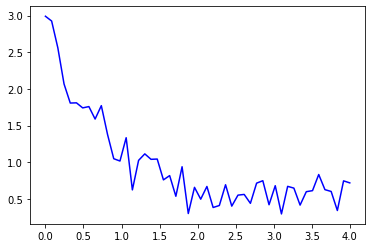

In [29]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

In [30]:
popt, pcov = curve_fit(func, xdata, ydata)

In [31]:
popt

array([2.48360065, 1.44722897, 0.53530269])

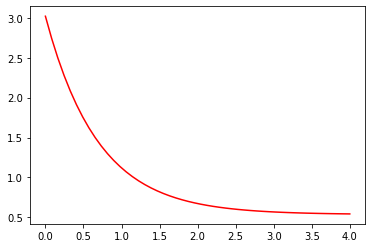

In [32]:
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [33]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))

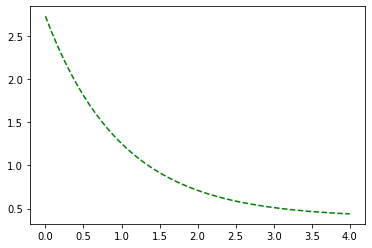

In [34]:
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [35]:
# take unfiltered crops of the image and collect curves
# analyze curve histogram

In [36]:
d

In [37]:
one_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [72]:
one_img = batch[0][0]

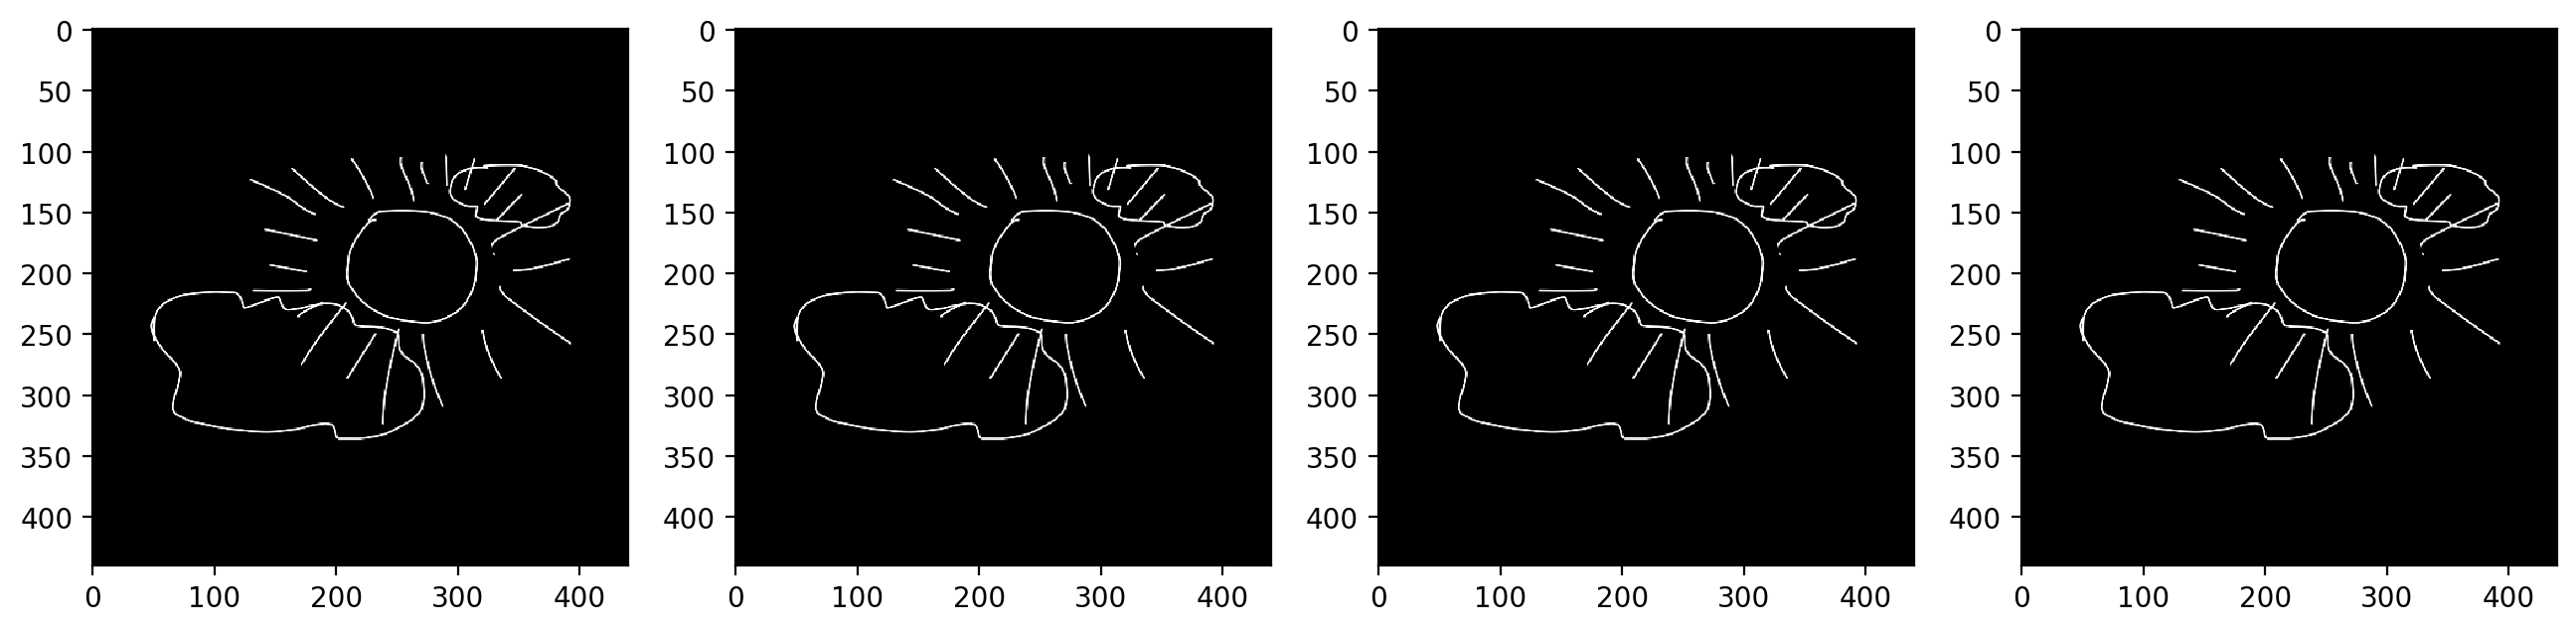

In [40]:
DataVisualizer.plot_batch([one_img, one_img, one_img, one_img], count=1)

In [41]:
one_img = one_img[100:200, 100:200]

In [42]:
one_img = one_img[40:80, 0:20]

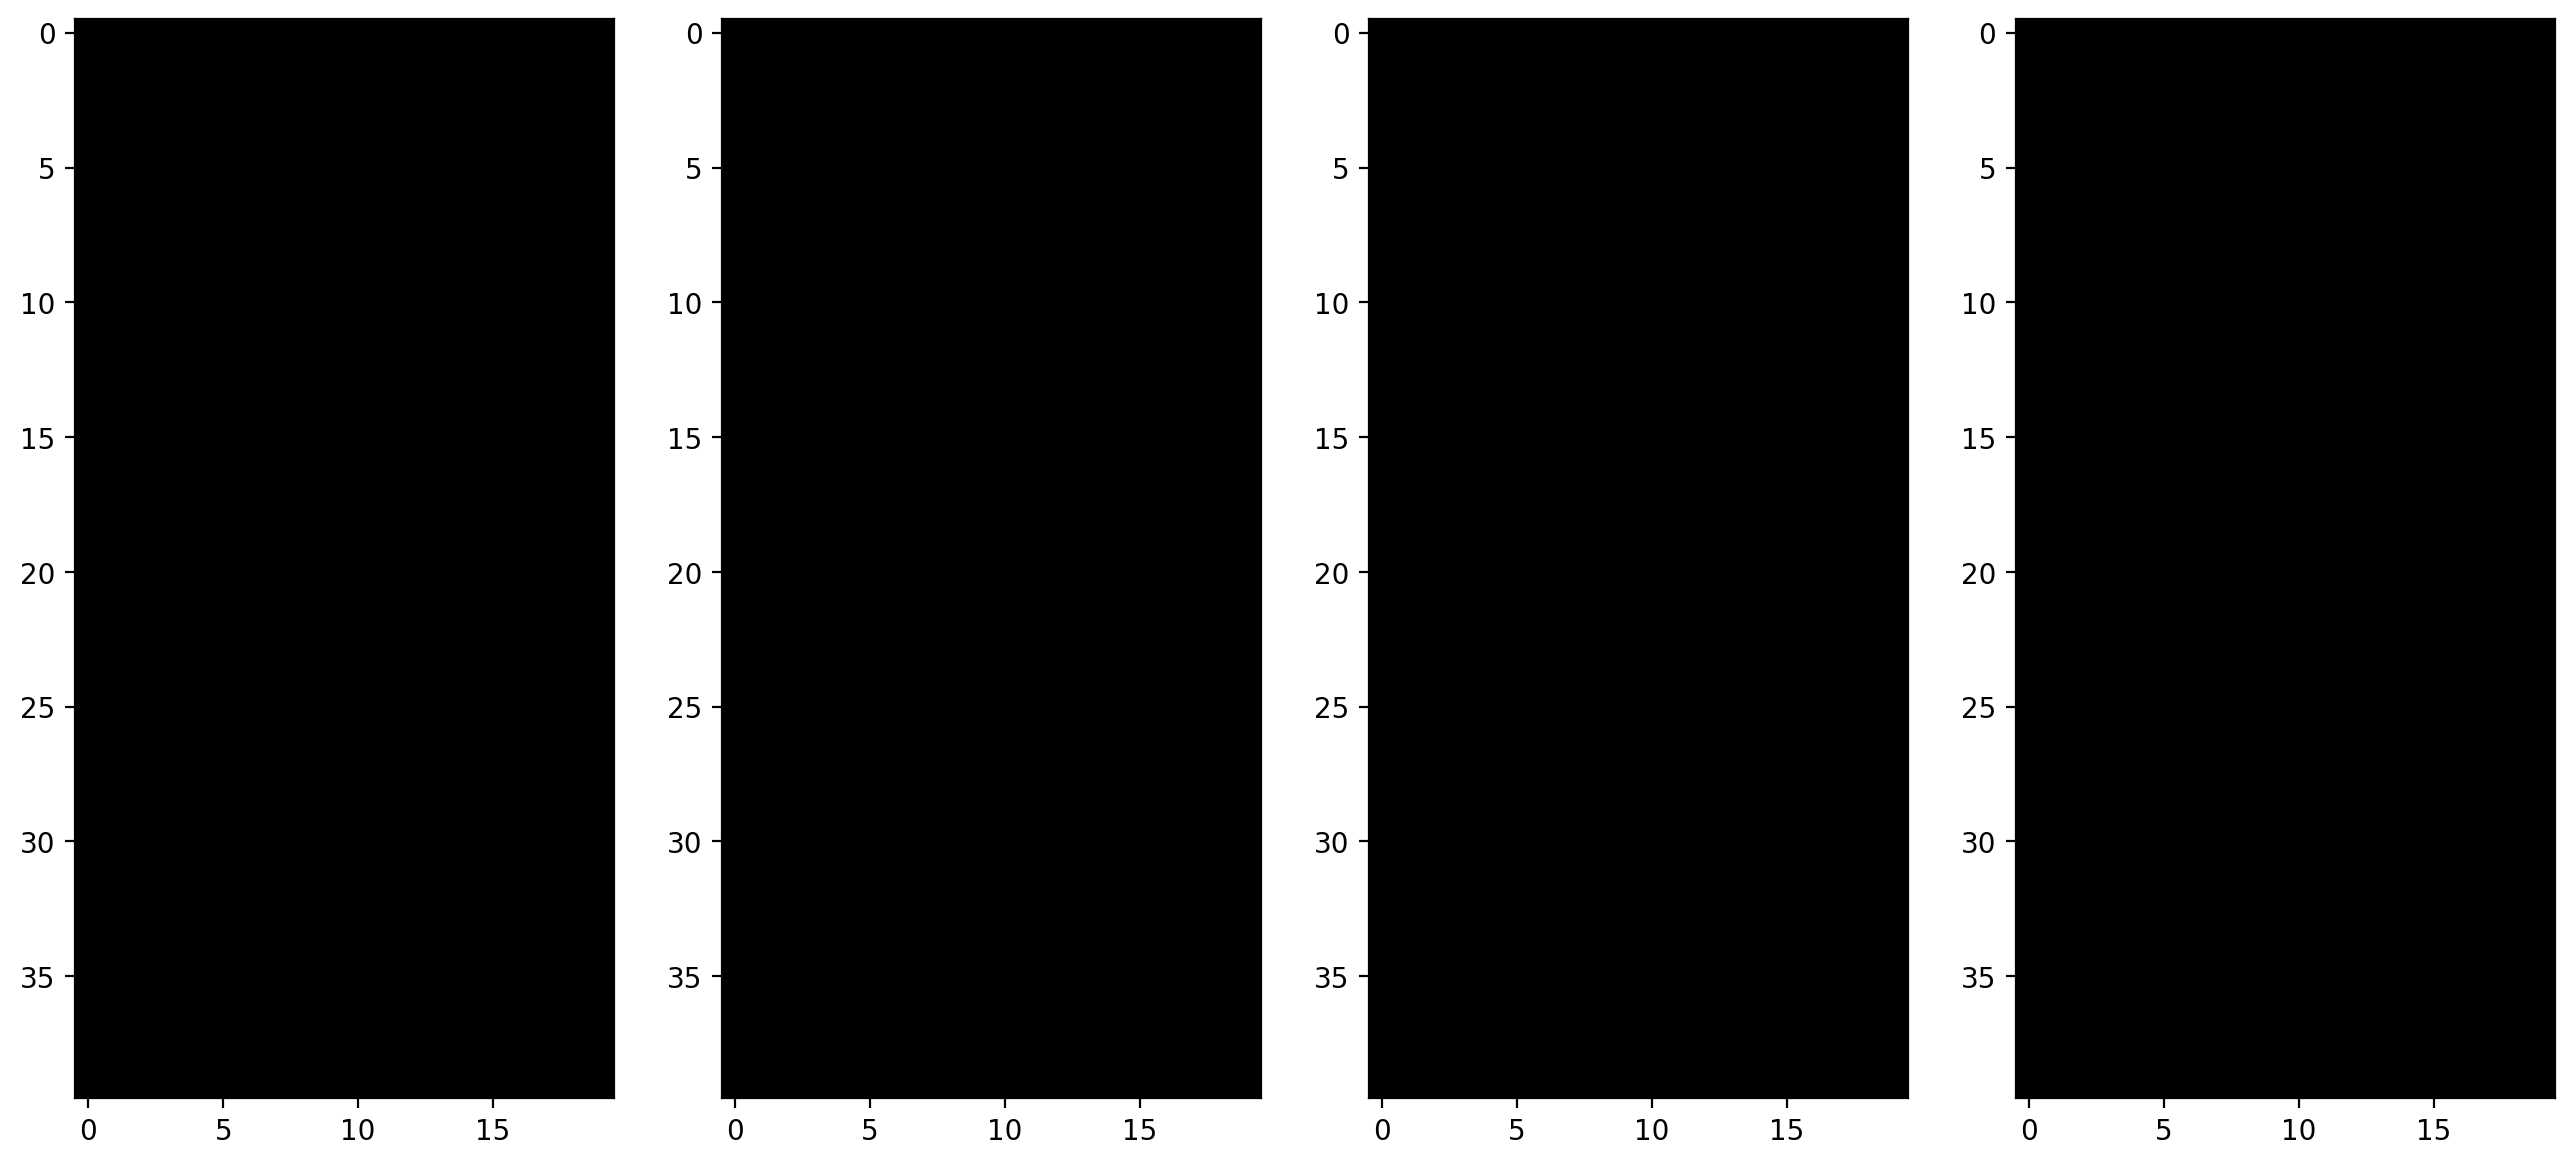

In [43]:
DataVisualizer.plot_batch([one_img, one_img, one_img, one_img], count=1)

In [44]:
one_img = batch[0][0]

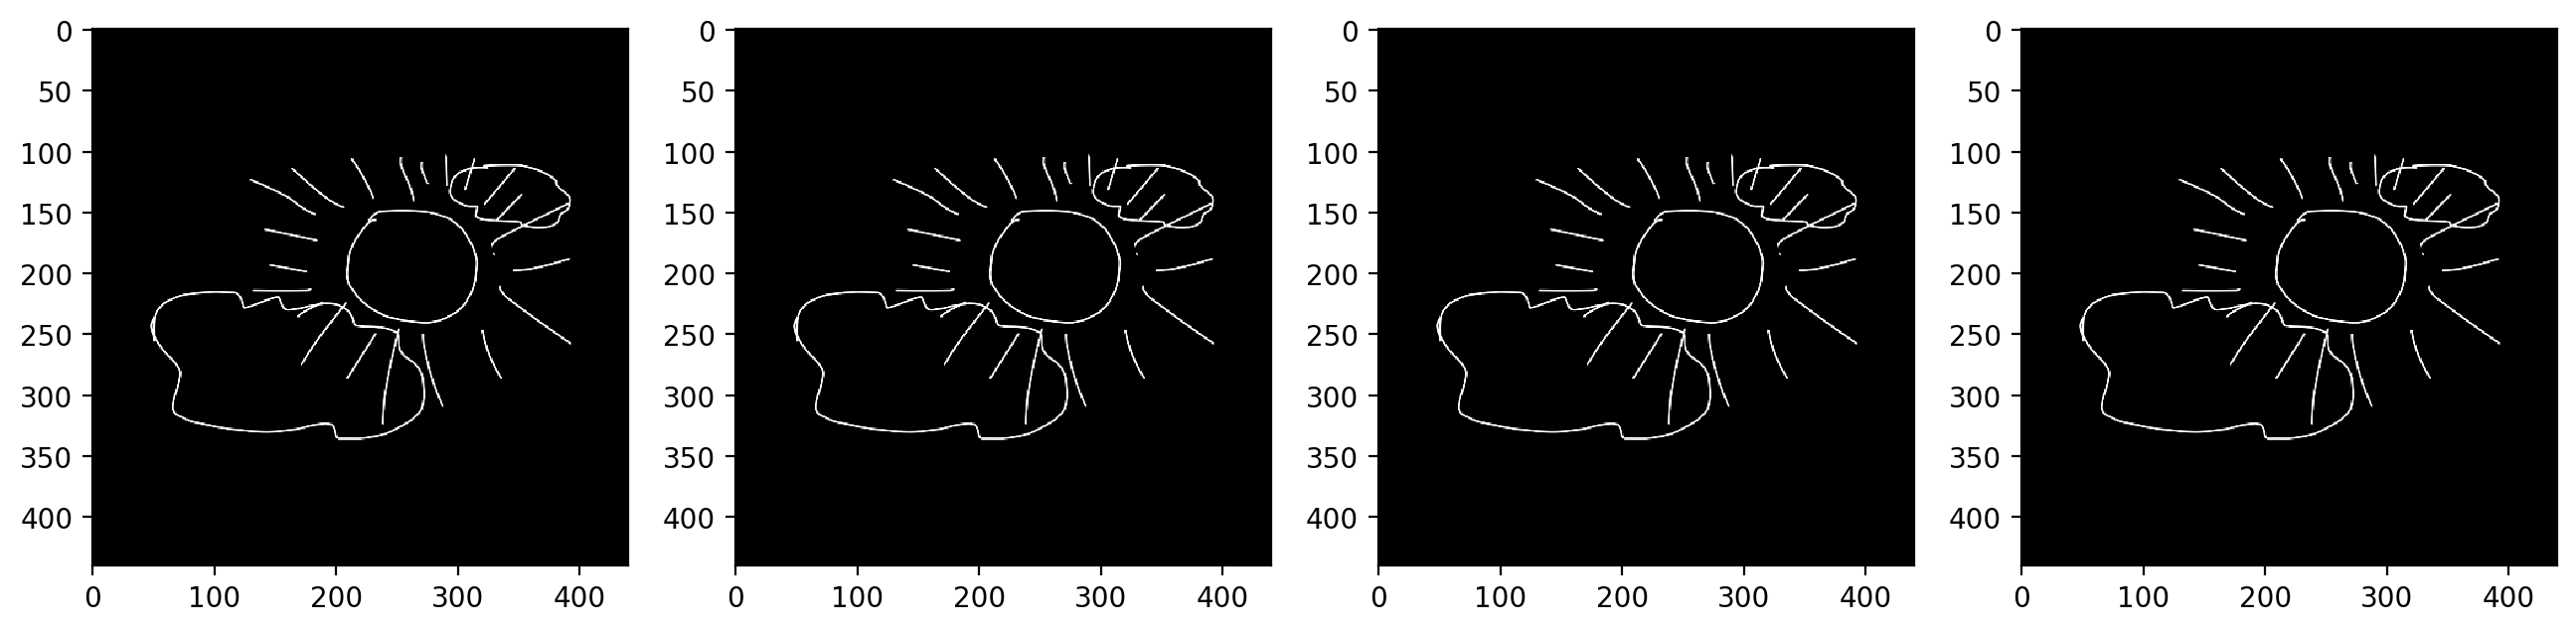

In [45]:
DataVisualizer.plot_batch([one_img, one_img, one_img, one_img], count=1)

In [46]:
one_img = one_img[80:200, 300:400]

In [47]:
one_img = one_img[60:80, 60:80]

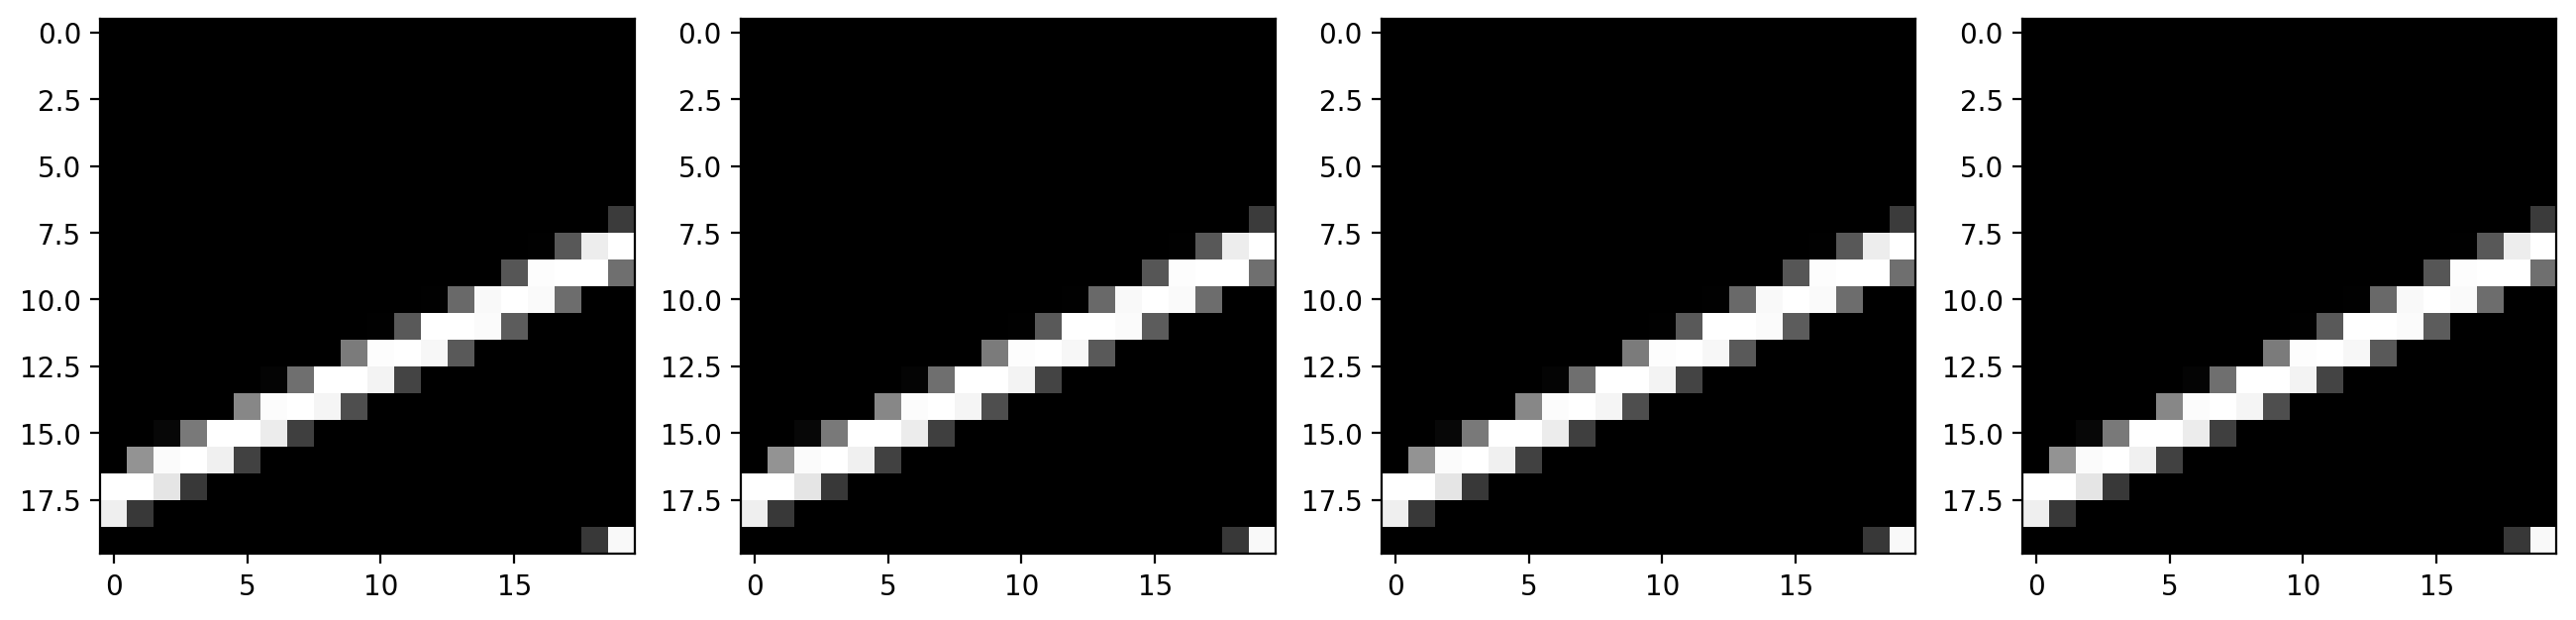

In [48]:
DataVisualizer.plot_batch([one_img, one_img, one_img, one_img], count=1)

In [49]:
one_img = batch[0][0]

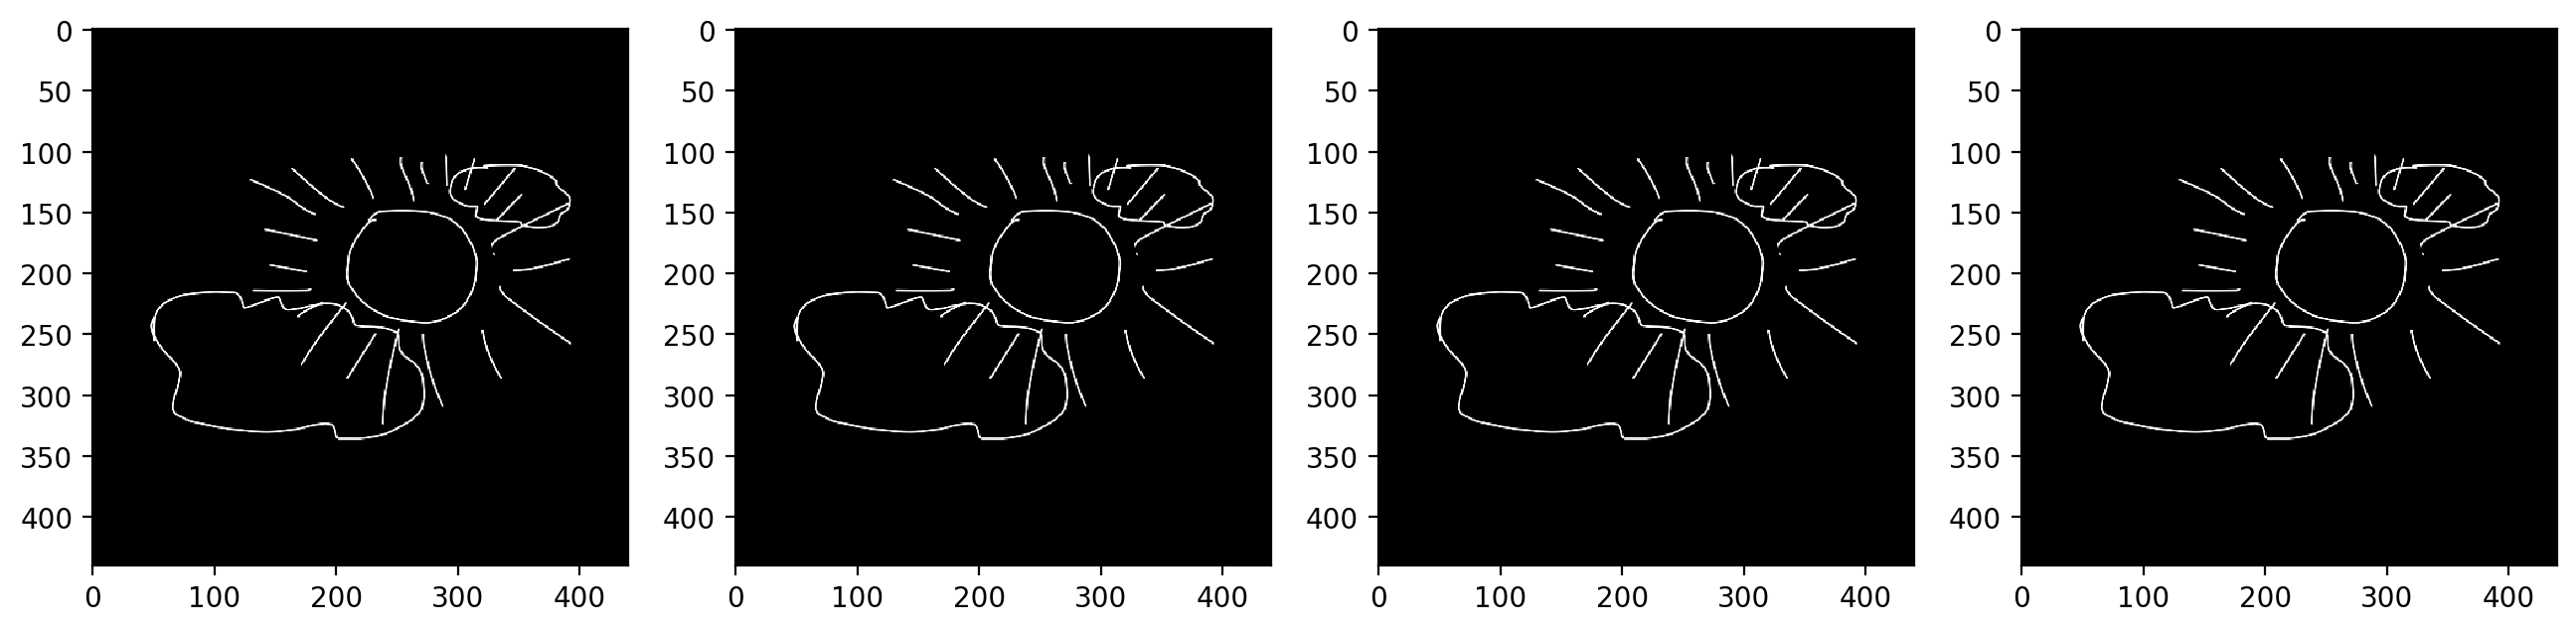

In [50]:
DataVisualizer.plot_batch([one_img, one_img, one_img, one_img], count=1)

In [51]:
one_img = one_img[250:300, 100:120]

In [52]:
one_img = one_img[40:80, 0:20]

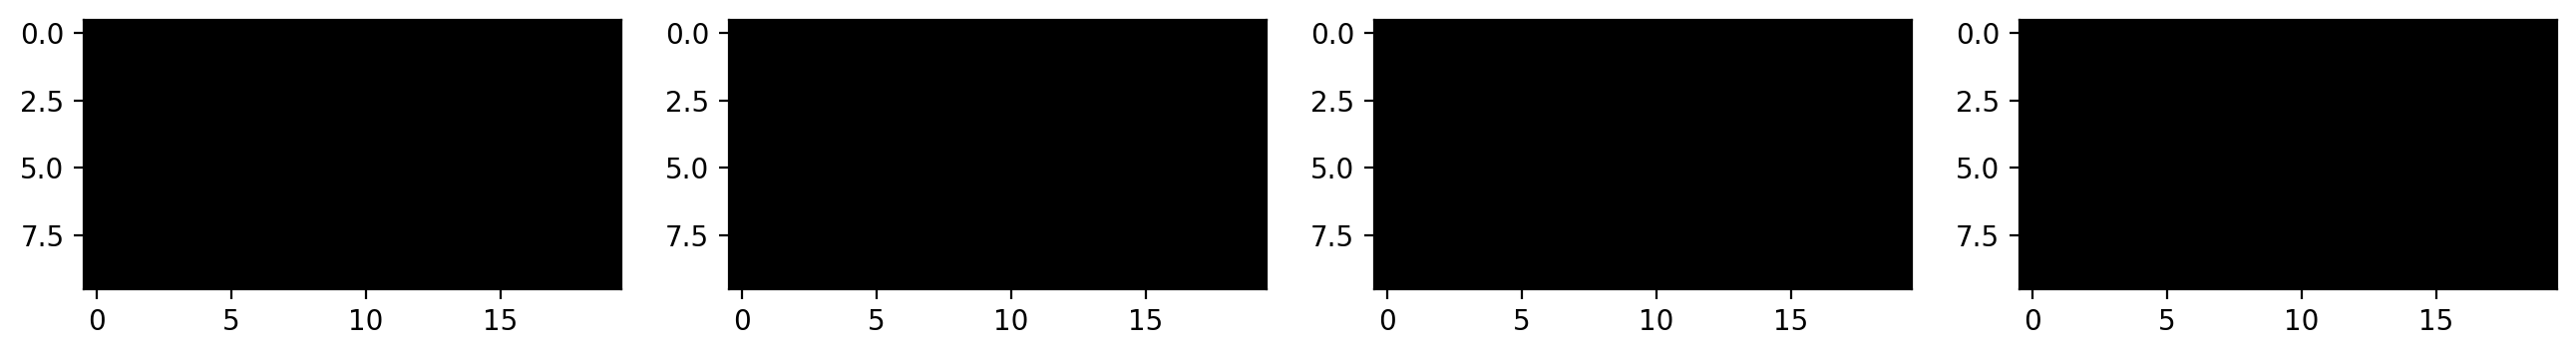

In [53]:
DataVisualizer.plot_batch([one_img, one_img, one_img, one_img], count=1)

In [54]:
from skimage.transform import hough_line, hough_line_peaks

In [73]:
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(one_img, theta=tested_angles)

In [74]:
from matplotlib import cm

In [75]:
angle_step = 0.5 * np.diff(theta).mean()

In [76]:
d_step = 0.5 * np.diff(d).mean()

In [77]:
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]

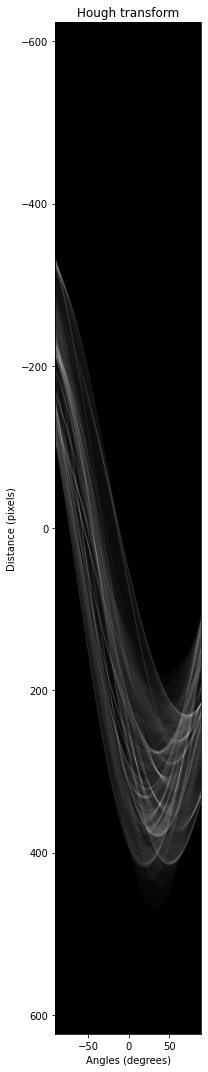

In [89]:
fig, axes = plt.subplots(figsize=(15, 15))
#ax = axes.ravel()
axes.imshow(h , extent=bounds, cmap=cm.gray)
axes.set_title('Hough transform')
axes.set_xlabel('Angles (degrees)')
axes.set_ylabel('Distance (pixels)')
axes.axis('image')
plt.tight_layout()
plt.show()

In [61]:
h

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint64)

In [62]:
nms = np.array(h)

In [63]:
np.mean(nms)

0.0

In [64]:
mean = np.mean(nms)

In [65]:
nms = np.subtract(nms, mean)

In [66]:
np.mean(nms)

0.0

In [67]:
h = nms.tolist()

In [68]:
h

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,